In [276]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [2]:
os.chdir(os.path.join(os.getcwd(),os.listdir()[3]))

In [278]:
label =  {'Pikachu':0 , 'Eevee':1 , 'Charizard':2, 'Bulbasaur':3 }
label2pok =  {0:'Pikachu' , 1:'Evee' , 2:'Charizard', 3:'Bulbasaur' }

In [279]:
x = []
y = []

In [280]:
for i in tqdm( os.listdir() ) :
    for j in os.listdir( os.path.join(os.getcwd(),i) ):
        path = os.path.join(os.getcwd(),i)
        fpath = os.path.join(path,j)
        img = cv2.imread(fpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(40,40))
        x.append(img)
        y.append(label[i])

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:36<00:00,  9.16s/it]


In [281]:
x = np.array(x)
y = np.array(y)
print(x.shape)     #4800 features 
print(y.shape)

(680, 40, 40, 3)
(680,)


# VISUALISING IMAGE

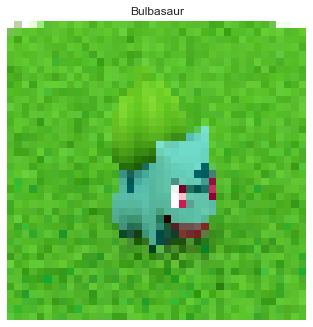

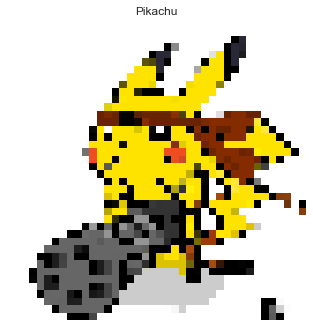

In [282]:
for k in range(2):
    i = np.random.randint(680)
    plt.imshow(x[i])
    plt.title(label2pok[y[i]])
    plt.axis('off')
    plt.show()

In [283]:
x = x.reshape(680,-1)
y = y.reshape(680,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(544, 4800)
(544, 1)
(136, 4800)
(136, 1)


In [285]:
x = x/255

# Implimenting MLP and checking on sklearn data

In [286]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))
def softmax(x):
    ae = np.exp(x)
    return ae/(np.sum(ae,axis = 1,keepdims = True))

In [287]:
class NeuralNetwork:
    def __init__(self,input_layer,layer,output_size):
        np.random.seed(42)
        model = {}
        
        model ['W1'] = np.random.randn(input_layer,layer)
        model ['W2'] = np.random.randn(layer,output_size)
        model['b1'] = np.zeros((1,layer))
        model['b2'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        
        #forward propagation 
        w1,b1 = self.model['W1'],self.model['b1']
        w2,b2 = self.model['W2'],self.model['b2']
        
        z2 = x.dot(w1) + b1
        a2 = np.tanh(z2)
        z3 = a2.dot(w2) + b2
        y_ = softmax(z3)
        self.activations = (a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate = 0.001):
        
        # backward pass
        w1,b1 = self.model['W1'],self.model['b1']
        w2,b2 = self.model['W2'],self.model['b2']
        a2,y_ = self.activations
        m = x.shape[0]
        
        del3 = y_ - y
        dw2 = np.dot(a2.T,del3)/float(m)
        db2 = np.sum(del3,axis = 0)/float(m)
        del2 = np.dot(del3,w2.T)*(1-np.square(a2))
        dw1 = np.dot(x.T,del2)/float(m)
        db1 = np.sum(del2,axis = 0)/float(m)
        
        # updating the parameters
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
    def predict(self,x):
        yp = self.forward(x)
        return np.argmax(yp,axis = 1)
    
    def summary(self):
        w1,b1 = self.model['W1'],self.model['b1']
        w2,b2 = self.model['W2'],self.model['b2']
        a2,y_ = self.activations
        
        print('W1',w1.shape)
        print('b1',b1.shape)
        print('a2',a2.shape)
        
        print('W2',w2.shape)
        print('b2',b2.shape)
        print('y_',y_.shape)
        
        
        

In [288]:
def loss(y,p):
    return (-np.mean( y*np.log(p)) )

def one_hot(yi,depth):
    m = len(yi)
    yoh = np.zeros((m,depth))
    yoh[np.arange(m),yi] = 1
    return yoh
    

In [289]:
from sklearn.datasets import make_circles
X,Y = make_circles(n_samples = 500, shuffle = True, noise = 0.05, factor = 0.6)


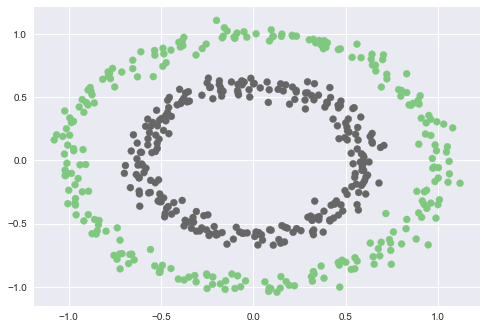

In [290]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

In [291]:
Yohv = one_hot(Y,2)

In [292]:
mdl = NeuralNetwork(input_layer=2,layer=6,output_size=2)

In [293]:
def train (x,y,epochs,mdl,learning_rate,logs=True):
    loss_log = []
    classes = 2
    for i in tqdm(range(epochs)):
        yp = mdl.forward(x)
        ls = loss(y,yp)
        mdl.backward(x,y,learning_rate)
        if (logs):
            loss_log.append(ls)
    if (logs):
        return loss_log

In [294]:
log = train(X,Yohv,500,mdl,0.3,True)

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4167.13it/s]


Text(0, 0.5, 'loss')

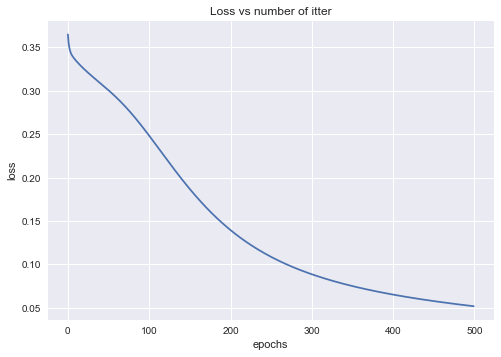

In [295]:
plt.plot(log)
plt.title('Loss vs number of itter')
plt.xlabel('epochs')
plt.ylabel('loss')

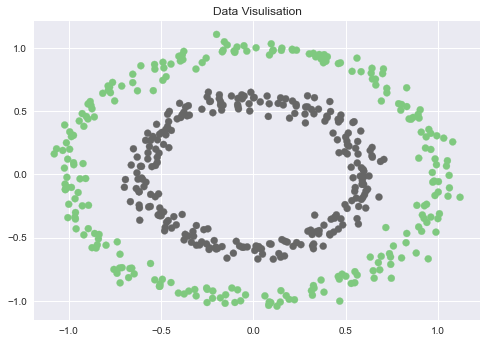

In [296]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.title('Data Visulisation')
plt.scatter(X[:,0],X[:,1],c = mdl.predict(X),cmap = plt.cm.Accent)
plt.show()

In [297]:
from sklearn.datasets import make_moons

In [298]:
X,Y = make_moons(n_samples = 500,noise = 0.2,shuffle=True)

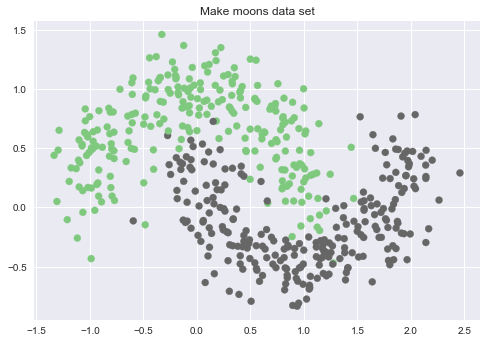

In [299]:
plt.title("Make moons data set")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

In [300]:
yone = one_hot(Y,2)

In [301]:
model = NeuralNetwork(2,6,2)

In [302]:
log = train(X,yone,1000,model,0.3,True)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4998.82it/s]


Text(0, 0.5, 'loss')

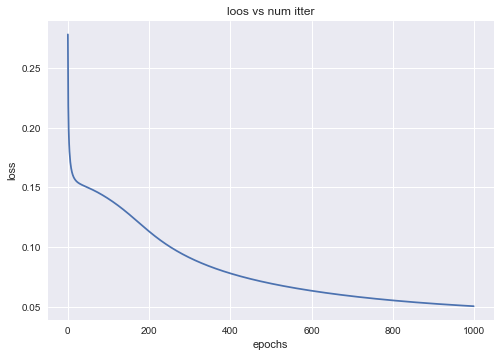

In [303]:
plt.plot(log)
plt.title('loos vs num itter')
plt.xlabel('epochs')
plt.ylabel('loss')

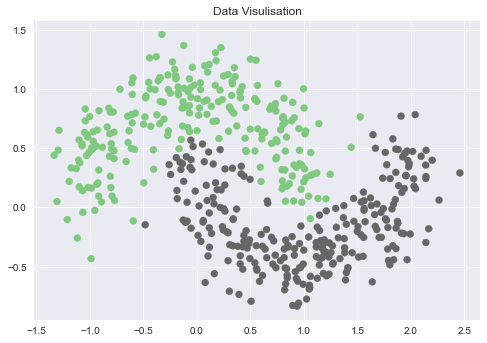

In [304]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.title('Data Visulisation')
plt.scatter(X[:,0],X[:,1],c = model.predict(X),cmap = plt.cm.Accent)
plt.show()

In [305]:
accu = np.sum(model.predict(X) == Y)/len(Y)
print('the accuracy is ',accu*100)

the accuracy is  96.6


# Pokemon Prediction 

In [379]:
class neuralnetwork:
    def __init__(self,input_layer,hid_layer,output_layer):
        np.random.seed(40)
        model = {}
        
        #for first layer 
        model['W1'] = np.random.randn(input_layer,hid_layer[0])
        model['b1'] = np.zeros((1,hid_layer[0]))
        #for second layer
        model['W2'] = np.random.randn(hid_layer[0],hid_layer[1])
        model['b2'] = np.zeros((1,hid_layer[1]))
        #for third layer
        model['W3'] = np.random.randn(hid_layer[1],output_layer)
        model['b3'] = np.zeros((1,output_layer))
        
        self.model = model
        
    def forward(self,x):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        #forward pass 
        z2 = np.dot(x,w1) + b1
        a2 = np.tanh(z2) 
        
        z3 = np.dot(a2,w2) + b2
        a3 = np.tanh(z3)
        
        z4 = np.dot(a3,w3) + b3
        y_ = softmax(z4)
        
        self.activation = (a2,a3,y_)
        return y_
    
    def backward(self,x,y,learning_rate = 0.001):
        
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a2,a3,y_ = self.activation 
        
        m = x.shape[0]
        
        del4 = y_ - y 
        dw3 = np.dot(a3.T,del4)/float(m)
        db3 = np.sum(del4,axis = 0)/float(m)
        
        del3 = np.dot(del4,w3.T)*(1-np.square(a3))
        dw2 = np.dot(a2.T,del3)/float(m)
        db2 = np.sum(del3,axis = 0)/float(m)
        
        del2 =  np.dot(del3,w2.T)*(1-np.square(a2))
        dw1 = np.dot(x.T,del2)/float(m)
        db1 = np.sum(del2,axis = 0)/float(m)
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
    def predict(self,x):
        yp = self.forward(x)
        return np.argmax(yp,axis = 1)
    
    def summary(self):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a2,a3,y_ = self.activation 
        
        print('W1',w1.shape)
        print('b1',b1.shape)
        print('a2',a2.shape)
        
        print('W2',w2.shape)
        print('b2',b2.shape)
        print('a3',a3.shape)
        
        print('W3',w3.shape)
        print('b3',b3.shape)
        print('y_',y_.shape)
        
        
        
        

In [314]:
X_train = x_train/255
Y_train = one_hot(y_train.flatten(),4)

In [321]:
X_train.shape

(544, 4800)

In [421]:
poke_model = neuralnetwork(4800,[100,50],4)
log = train(X_train,Y_train,2000,poke_model,0.1,True)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:54<00:00, 36.83it/s]


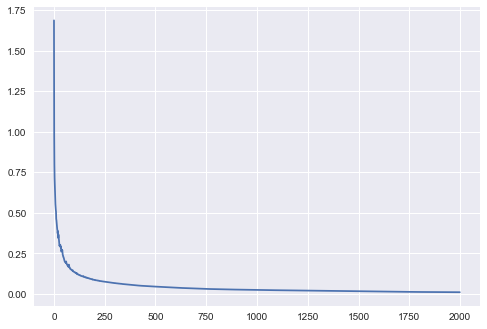

In [422]:
plt.plot(log)

In [423]:
accu = np.sum( poke_model.predict(X_train) == y_train.flatten() )/len(y_train)
print('The accuracy is ',accu*100)

The accuracy is  99.44852941176471


In [424]:
accu = np.sum( poke_model.predict(x_test/255) == y_test.flatten() )/len(y_test)
print('The accuracy is ',accu*100)

The accuracy is  69.85294117647058


In [425]:
# Trying with cross validation set
from sklearn.metrics import classification_report

In [426]:
print ( classification_report(poke_model.predict(X_train),y_train.flatten()) )

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       254
           1       0.97      0.97      0.97        35
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00       223

    accuracy                           0.99       544
   macro avg       0.98      0.99      0.99       544
weighted avg       0.99      0.99      0.99       544



In [428]:
poke_model.predict(x_test/255) == y_test.flatten()

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,